# Uplaod data to gs bucket

In [1]:
!gsutil -m cp -r  data gs://object-detection-pipeline-demo/workspace/local/annotations

Copying file://data\TEST\default.tfrecord [Content-Type=application/octet-stream]...
Copying file://data\TEST\label_map.pbtxt [Content-Type=application/octet-stream]...
/ [0/4 files][    0.0 B/  1.2 MiB]   0% Done                                    
/ [0/4 files][    0.0 B/  1.2 MiB]   0% Done                                    
Copying file://data\TRAIN\label_map.pbtxt [Content-Type=application/octet-stream]...
/ [0/4 files][    0.0 B/  1.2 MiB]   0% Done                                    
Copying file://data\TRAIN\default.tfrecord [Content-Type=application/octet-stream]...
/ [0/4 files][    0.0 B/  1.2 MiB]   0% Done                                    
/ [1/4 files][  1.2 MiB/  1.2 MiB]  99% Done                                    
-
- [2/4 files][  1.2 MiB/  1.2 MiB]  99% Done                                    
- [3/4 files][  1.2 MiB/  1.2 MiB]  99% Done                                    
- [4/4 files][  1.2 MiB/  1.2 MiB] 100% Done                                    

Operation

# Make some directory

In [2]:
%%writefile setup.sh
git clone https://github.com/ankitaj85/tensorflow-object-detection-api-setup.git
cd tensorflow-object-detection-api-setup
chmod +x setup-object-detection-api-tf-2-4-0.sh
./setup-object-detection-api-tf-2-4-0.sh

Overwriting setup.sh


# List of Models
Model name                                                                                                                                                                  | Speed (ms) | COCO mAP | Outputs
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :--------: | :----------: | :-----:
[CenterNet HourGlass104 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_512x512_coco17_tpu-8.tar.gz)                    | 70         | 41.9           | Boxes
[CenterNet HourGlass104 Keypoints 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz)                    | 76         | 40.0/61.4           | Boxes/Keypoints
[CenterNet HourGlass104 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz)               | 197       | 44.5           | Boxes
[CenterNet HourGlass104 Keypoints 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_kpts_coco17_tpu-32.tar.gz)               | 211       | 42.8/64.5          | Boxes/Keypoints
[CenterNet Resnet50 V1 FPN 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz)     | 27         | 31.2           | Boxes
[CenterNet Resnet50 V1 FPN Keypoints 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_kpts_coco17_tpu-8.tar.gz)     | 30         | 29.3/50.7         | Boxes/Keypoints
[CenterNet Resnet101 V1 FPN 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz)     | 34         | 34.2           | Boxes
[CenterNet Resnet50 V2 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz)     | 27         | 29.5           | Boxes
[CenterNet Resnet50 V2 Keypoints 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_kpts_coco17_tpu-8.tar.gz)     | 30         | 27.6/48.2           | Boxes/Keypoints
[EfficientDet D0 512x512](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz)                                  | 39         | 33.6           | Boxes
[EfficientDet D1 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz)                                  | 54         | 38.4           | Boxes
[EfficientDet D2 768x768](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz)                                  | 67         | 41.8           | Boxes
[EfficientDet D3 896x896](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz)                                  | 95         | 45.4           | Boxes
[EfficientDet D4 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d4_coco17_tpu-32.tar.gz)                              | 133         | 48.5           | Boxes
[EfficientDet D5 1280x1280](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz)                             | 222         | 49.7           | Boxes
[EfficientDet D6 1280x1280](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d6_coco17_tpu-32.tar.gz)                             | 268         | 50.5           | Boxes
[EfficientDet D7 1536x1536](http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d7_coco17_tpu-32.tar.gz)                             | 325         | 51.2           | Boxes
[SSD MobileNet v2 320x320](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz)                                |19         | 20.2           | Boxes
[SSD MobileNet V1 FPN 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz)                        | 48        | 29.1           | Boxes
[SSD MobileNet V2 FPNLite 320x320](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz)                | 22         | 22.2           | Boxes
[SSD MobileNet V2 FPNLite 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz)                | 39         | 28.2           | Boxes
[SSD ResNet50 V1 FPN 640x640 (RetinaNet50)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz)                          | 46         | 34.3           | Boxes
[SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz)                      | 87         | 38.3           | Boxes
[SSD ResNet101 V1 FPN 640x640 (RetinaNet101)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz)                        | 57         | 35.6           | Boxes
[SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz)                    | 104        | 39.5           | Boxes
[SSD ResNet152 V1 FPN 640x640 (RetinaNet152)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8.tar.gz)                        | 80         | 35.4           | Boxes
[SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)](http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8.tar.gz)                    | 111        | 39.6           | Boxes
[Faster R-CNN ResNet50 V1 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz)                 | 53         | 29.3           | Boxes
[Faster R-CNN ResNet50 V1 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_1024x1024_coco17_tpu-8.tar.gz)             | 65         | 31.0           | Boxes
[Faster R-CNN ResNet50 V1 800x1333](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_800x1333_coco17_gpu-8.tar.gz)               | 65         | 31.6           | Boxes
[Faster R-CNN ResNet101 V1 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz)               |    55      | 31.8           | Boxes
[Faster R-CNN ResNet101 V1 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8.tar.gz)           | 72         | 37.1           | Boxes
[Faster R-CNN ResNet101 V1 800x1333](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_800x1333_coco17_gpu-8.tar.gz)             | 77         | 36.6           | Boxes
[Faster R-CNN ResNet152 V1 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.tar.gz)               | 64         | 32.4           | Boxes
[Faster R-CNN ResNet152 V1 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_1024x1024_coco17_tpu-8.tar.gz)           | 85         | 37.6           | Boxes
[Faster R-CNN ResNet152 V1 800x1333](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz)             | 101         | 37.4           | Boxes
[Faster R-CNN Inception ResNet V2 640x640](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz)             | 206         | 37.7           | Boxes
[Faster R-CNN Inception ResNet V2 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz)             | 236         | 38.7           | Boxes
[Mask R-CNN Inception ResNet V2 1024x1024](http://download.tensorflow.org/models/object_detection/tf2/20200711/mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8.tar.gz) |    301      | 39.0/34.6           | Boxes/Masks
[ExtremeNet](http://download.tensorflow.org/models/object_detection/tf2/20200711/extremenet.tar.gz)                                                                         | --         | --           | Boxes


In [3]:
%%writefile download_model.sh
# Download the checkpoint and put it into models/research/object_detection/test_data/
model_display_name=ssd_mobilenet_v1_fpn_640x640_coco17_tpu_8
DOWNLOAD_PATH=~/TensorFlow/workspace/local/pre-trained-raw/
EXTRACT_PATH=~/TensorFlow/workspace/local/pre-trained-models
echo ${DOWNLOAD_PATH}
echo $EXTRACT_PATH
if [ $model_display_name==ssd_mobilenet_v1_fpn_640x640_coco17_tpu_8 ]
then 
  if [ -f "$DOWNLOAD_PATH/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz" ] 
  then
    echo File Exist - Below Find List of Models
    ls $DOWNLOAD_PATH
  else
    wget  -q http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz -P ${DOWNLOAD_PATH}
    tar -xf ${DOWNLOAD_PATH}/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz -C $EXTRACT_PATH
  fi  
else
   echo "a is not equal to b"
fi
# https://cloud.google.com/storage/docs/gsutil/commands/cp#:~:text=The%20gsutil%20cp%20command%20allows%20you%20to%20copy,can%20also%20download%20text%20files%20from%20a%20bucket:
gsutil -m cp -r  ~/Tensorflow/ gs://object-detection-pipeline-demo/
#!mv centernet_hg104_512x512_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

Overwriting download_model.sh


In [4]:
%%writefile config.yaml
# define path 

FINE_TUNE_CHECKPOINT_TYPE : 'detection'
FINE_TUNE_CHECKPOINT : gs://object-detection-pipeline-demo/workspace/local/pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0
TRAIN_TFRECORD : gs://object-detection-pipeline-demo/workspace/local/annotations/TRAIN/default.tfrecord
TEST_TFRECORD : gs://object-detection-pipeline-demo/workspace/local/annotations/TEST/default.tfrecord
CONFIG_PATH : gs://object-detection-pipeline-demo/workspace/local/pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
LABEL_MAP : gs://object-detection-pipeline-demo/workspace/local/annotations/TRAIN/label_map.pbtxt
NUM_CLASSES : 2
BATCH_SIZE : 10
NUM_STEPS : 1000
    

Writing config.yaml


In [5]:
%%writefile requirements.txt
yaml

Overwriting requirements.txt


In [6]:
%%writefile pipeline_config.py
# Configure pipeline.config

import yaml

with open("config.yaml",'r') as infile:
    config = yaml.load(infile.read(), Loader=yaml.SafeLoader)

FINE_TUNE_CHECKPOINT_TYPE = config.FINE_TUNE_CHECKPOINT_TYPE
FINE_TUNE_CHECKPOINT      = config.FINE_TUNE_CHECKPOINT
TRAIN_TFRECORD            = [config.TRAIN_TFRECORD]
TEST_TFRECORD             = [config.TEST_TFRECORD]
CONFIG_PATH               = config.CONFIG_PATH
NUM_CLASSES               = config.NUM_CLASSES
BATCH_SIZE                = config.BATCH_SIZE
LABEL_MAP                 = config.LABEL_MAP
NUM_STEPS                 = config.NUM_STEPS


import tensorflow as tf
from google.protobuf import text_format
import object_detection
from object_detection.protos import pipeline_pb2
pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)     

pipeline.train_config.fine_tune_checkpoint = FINE_TUNE_CHECKPOINT
pipeline.train_config.fine_tune_checkpoint_type = FINE_TUNE_CHECKPOINT_TYPE
pipeline.train_config.batch_size=BATCH_SIZE 
pipeline.train_config.num_steps=NUM_STEPS               
pipeline.model.ssd.num_classes = NUM_CLASSES

# TRAIN INPUT PATH CONFIGURATION
pipeline.train_input_reader.tf_record_input_reader.input_path[:] = TRAIN_TFRECORD # it's a repeated field 
pipeline.train_input_reader.label_map_path = LABEL_MAP

# TEST INPUT PATH CONFIGURATION
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = TEST_TFRECORD # it's a repeated field 
pipeline.eval_input_reader[0].label_map_path = LABEL_MAP

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)


Overwriting pipeline_config.py


In [5]:
%%writefile start_training.sh 
cd ~/TensorFlow/models/research 
PIPELINE_CONFIG_PATH=gs://object-detection-pipeline-demo/workspace/local/pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
MODEL_DIR=gs://object-detection-pipeline-demo/workspace/local/model-checkpoints/2
NUM_TRAIN_STEPS=10000
SAMPLE_1_OF_N_EVAL_EXAMPLES=1
python3 object_detection/model_main_tf2.py \
  --model_dir=$MODEL_DIR --num_train_steps=$NUM_TRAIN_STEPS \
  --sample_1_of_n_eval_examples=$SAMPLE_1_OF_N_EVAL_EXAMPLES \
  --pipeline_config_path=$PIPELINE_CONFIG_PATH \
  --alsologtostderr

Writing start_training.sh


# Export Model

In [6]:
%%writefile export_model.sh
cd ~/TensorFlow/models/research 
CONFIG_PATH=gs://object-detection-pipeline-demo/workspace/local/pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
MODEL_DIR=gs://object-detection-pipeline-demo/workspace/local/model-checkpoints/2
EXPORT_MODEL=gs://object-detection-pipeline-demo/workspace/local/exported-models/2
python3 object_detection/exporter_main_v2.py \
    --input_type image_tensor \
    --pipeline_config_path $CONFIG_PATH \
    --trained_checkpoint_dir $MODEL_DIR \
    --output_directory $EXPORT_MODEL
    #--config_override " \
    #      model{ \
    #        faster_rcnn { \
    #         second_stage_post_processing { \
    #          batch_non_max_suppression { \
    #           score_threshold: 0.5 \
    #         } \
    #       } \
    #     } \
    #  }"

#If side inputs are desired, the following arguments could be appended
#(the example below is for Context R-CNN).
#   --use_side_inputs True \
#   --side_input_shapes 1,2000,2057/1 \
#   --side_input_names context_features,valid_context_size \
#   --side_input_types tf.float32,tf.int32

Writing export_model.sh


In [11]:
#!zip -r /root/TensorFlow/workspace/local/exported-models/2.zip /root/TensorFlow/workspace/local/exported-models/2

# Inference 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def get_keypoint_tuples(eval_config):
  """Return a tuple list of keypoint edges from the eval config.
  
  Args:
    eval_config: an eval config containing the keypoint edges
  
  Returns:
    a list of edge tuples, each in the format (start, end)
  """
  tuple_list = []
  kp_list = eval_config.keypoint_edge
  for edge in kp_list:
    tuple_list.append((edge.start, edge.end))
  return tuple_list

In [ ]:
pipeline_config = '/root/TensorFlow/workspace/local/pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config'
model_dir = '/root/TensorFlow/workspace/local/exported-models/2/checkpoint/'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join(model_dir, 'ckpt-0')).expect_partial()

def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [ ]:
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

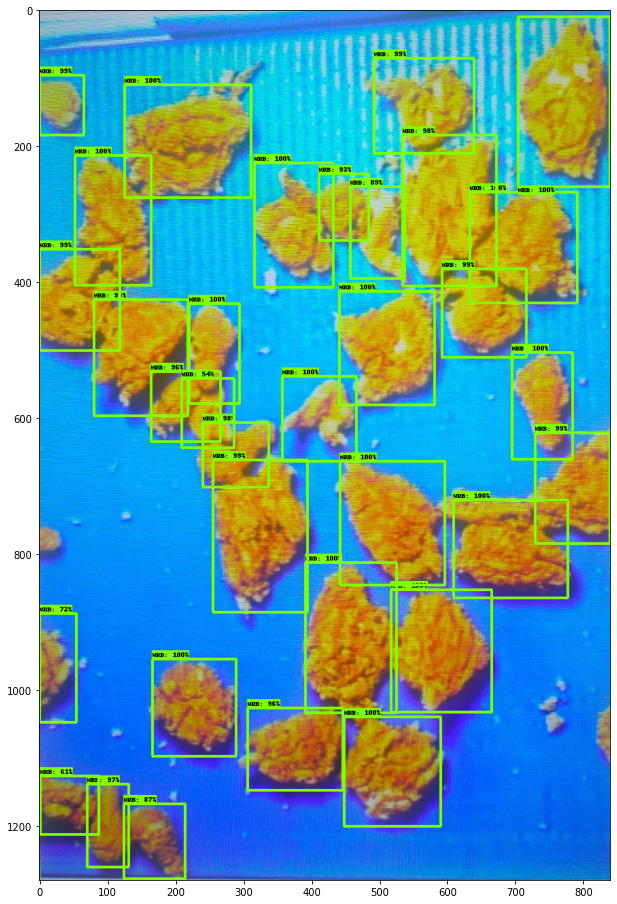

In [ ]:
image_dir = '/root/TensorFlow/workspace/local/images'
image_path = os.path.join(image_dir, 'chicken-3.jpeg')
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

# Use keypoints if available in detections
keypoints, keypoint_scores = None, None
if 'detection_keypoints' in detections:
  keypoints = detections['detection_keypoints'][0].numpy()
  keypoint_scores = detections['detection_keypoint_scores'][0].numpy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False,
      keypoints=keypoints,
      keypoint_scores=keypoint_scores,
      keypoint_edges=get_keypoint_tuples(configs['eval_config']))

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()